# 9. A) Otimizar todos os parâmetros da rede do slide 176 simultaneamente com backpropagation

Cenário

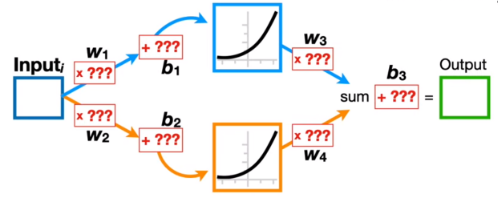

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#torch.manual_seed(42)

In [271]:
simple_dataset = {'dosage': [[0], [.5], [1]],
                  'label': [[0], [1], [0]]}
dataset_tensor = torch.tensor(simple_dataset['dosage'],
                              dtype=torch.float32)
y_true = torch.tensor(simple_dataset['label'], dtype=torch.float32)


In [272]:
w1 = torch.randn(1, dtype=torch.float64, requires_grad=True)
w2 = torch.randn(1, dtype=torch.float64, requires_grad=True)
w3 = torch.randn(1, dtype=torch.float64, requires_grad=True)
w4 = torch.randn(1, dtype=torch.float64, requires_grad=True)

b1 = torch.zeros(1, dtype=torch.float64, requires_grad=True)
b2 = torch.zeros(1, dtype=torch.float64, requires_grad=True)
b3 = torch.zeros(1, dtype=torch.float64, requires_grad=True)

In [273]:
# def activation(x):
#   return torch.log(1 + torch.exp(x))

In [274]:
import torch
import torch.nn as nn

activation = torch.nn.Softplus()

num_epochs = 1000
learning_rate = 0.1
grad_clip_value = 1  # Valor para cortar os gradientes

SSR_history = []
for epoch in range(num_epochs):
    # Forward pass
    h1 = activation((w1 * dataset_tensor) + b1)  # Saída do primeiro neurônio
    h2 = activation((w2 * dataset_tensor) + b2)  # Saída do segundo neurônio
    y_pred = (w3 * h1) + (w4 * h2) + b3.expand_as(h1)

    SSR = torch.sum((y_pred - y_true) ** 2)

    # Backpropagation
    SSR.backward()

    # Aplicar o corte nos gradientes
    torch.nn.utils.clip_grad_norm_([w1, w2, w3, w4, b1, b2, b3], grad_clip_value)

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        w4 -= learning_rate * w4.grad

        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
        b3 -= learning_rate * b3.grad

        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        w4.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
        b3.grad.zero_()

    SSR_history.append(SSR.item())

    if (epoch + 1) % 100 == 0:
        print(f"Época [{epoch + 1}/{num_epochs}], SSR: {SSR.item():.4f}")

print(f"Valor final da perda (SSR): {SSR_history[-1]:.4f}")


Época [100/1000], SSR: 0.5875
Época [200/1000], SSR: 0.3636
Época [300/1000], SSR: 0.0397
Época [400/1000], SSR: 0.0006
Época [500/1000], SSR: 0.0000
Época [600/1000], SSR: 0.0000
Época [700/1000], SSR: 0.0000
Época [800/1000], SSR: 0.0008
Época [900/1000], SSR: 0.0240
Época [1000/1000], SSR: 0.0086
Valor final da perda (SSR): 0.0086


#### Nota:
```clip_grad_norm_``` aplica uma norma (geralmente a norma L2) aos gradientes e, caso a norma total dos gradientes ultrapasse um valor limite predefinido, ela os escala de forma que a norma total seja igual a esse valor limite, preservando a direção dos gradientes. Com essa função foi possível fazer os valores de pesos e bias convergirem no treinamento para os valores esperados.

In [275]:
print(f' w1: {w1.item()}\n w2: {w2.item()}\n w3: {w3.item()}\n w4: {w4.item()}\n b1: {b1.item()}\n b2: {b2.item()}\n b3: {b3.item()}')

 w1: -3.6365436748388436
 w2: 2.8462953408201495
 w3: -2.307335521694155
 w4: -1.5449493418382227
 b1: 0.491404405675079
 b2: -1.5203267470014799
 b3: 2.5820449972429076


Resultado esperado

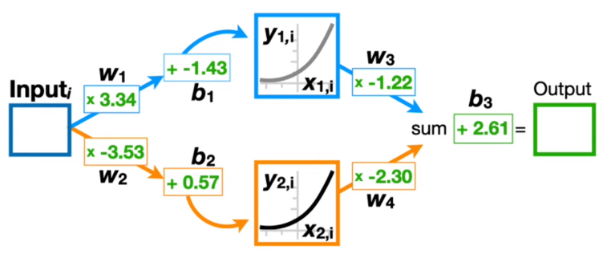

Estes foram os resultados obtidos que mais se aproximaram dos valores de pesos e biases esperados.<br> Por mais que os valores resultantes dos pesos e biases nao estejam diretamente relacionados aos nomes das variáveis, quando são combinados nas funções dentro dos neurônios não fará diferença, pois é como se o neurônio 1 passasse a ter o nome do neurônio 2 e vice versa. Ao final, a combinação dos dois neurônios não será afetada por essa troca de valores/nomes de variáveis.



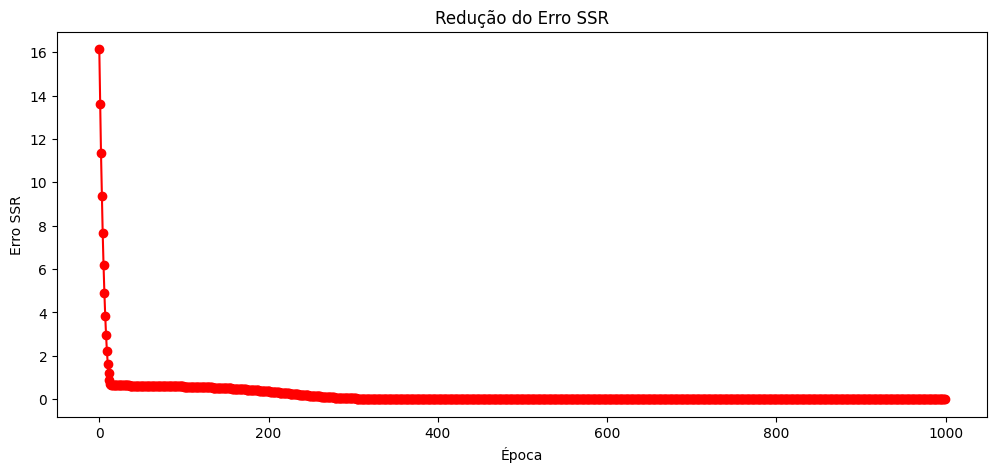

In [276]:
plt.figure(figsize=(12, 5))
plt.plot(SSR_history, marker='o', linestyle='-', color='r')
plt.xlabel('Época')
plt.ylabel('Erro SSR')
plt.title('Redução do Erro SSR')

plt.show()

---
### 9. A) Realizando a mesma tarefa, mas com pytorch

In [332]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [333]:
simple_dataset = {'dosage': [[0], [0.5], [1]],
                  'label': [[0], [1], [0]]}
dataset_tensor = torch.tensor(simple_dataset['dosage'], dtype=torch.float32)
y_true = torch.tensor(simple_dataset['label'], dtype=torch.float32)

In [334]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # pesos: random com média 0 e desvio padrão 0.1
        self.w1 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.w2 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.w3 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.w4 = nn.Parameter(torch.randn(1), requires_grad=True)

        self.b1 = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.b2 = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.b3 = nn.Parameter(torch.zeros(1), requires_grad=True)

        self.activation = nn.Softplus()

    def forward(self, x):
        h1 = self.activation(self.w1 * x + self.b1)  # Neurônio 1
        h2 = self.activation(self.w2 * x + self.b2)  # Neurônio 2
        output = (self.w3 * h1) + (self.w4 * h2) + self.b3  # Saída final
        return output

In [352]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 2000

# Treinamento
SSR_history = []
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(dataset_tensor)

    # Cálculo da perda (SSR)
    SSR = criterion(y_pred, y_true)

    # Backpropagation e otimização
    optimizer.zero_grad()  # Zerar os gradientes anteriores
    SSR.backward()  # Calcular os gradientes
    optimizer.step()  # Atualizar os pesos

    SSR_history.append(SSR.item())

    if (epoch + 1) % 100 == 0:
        print(f"Época [{epoch + 1}/{num_epochs}], SSR: {SSR.item():.4f}")

print(f"Valor final da perda (SSR): {SSR_history[-1]:.4f}")

Época [100/2000], SSR: 0.2208
Época [200/2000], SSR: 0.2179
Época [300/2000], SSR: 0.2162
Época [400/2000], SSR: 0.2140
Época [500/2000], SSR: 0.2107
Época [600/2000], SSR: 0.2051
Época [700/2000], SSR: 0.1956
Época [800/2000], SSR: 0.1801
Época [900/2000], SSR: 0.1561
Época [1000/2000], SSR: 0.1220
Época [1100/2000], SSR: 0.0805
Época [1200/2000], SSR: 0.0418
Época [1300/2000], SSR: 0.0165
Época [1400/2000], SSR: 0.0051
Época [1500/2000], SSR: 0.0014
Época [1600/2000], SSR: 0.0003
Época [1700/2000], SSR: 0.0001
Época [1800/2000], SSR: 0.0000
Época [1900/2000], SSR: 0.0000
Época [2000/2000], SSR: 0.0000
Valor final da perda (SSR): 0.0000


In [353]:
print("Bias:")
print(model.b1.item(), model.b2.item(), model.b3.item())
print("Pesos:")
print(model.w1.item(), model.w2.item(), model.w3.item(), model.w4.item())

Bias:
0.5644317865371704 -1.0209721326828003 2.772186756134033
Pesos:
-3.9875643253326416 2.603070020675659 -2.2691051959991455 -1.5255438089370728


Resultado esperado

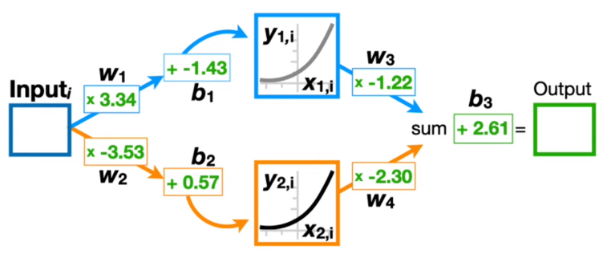

Estes foram os resultados obtidos que mais se aproximaram dos valores de pesos e biases esperados. Os resultados aqui ocorreram da mesma forma como no experimento anterior.

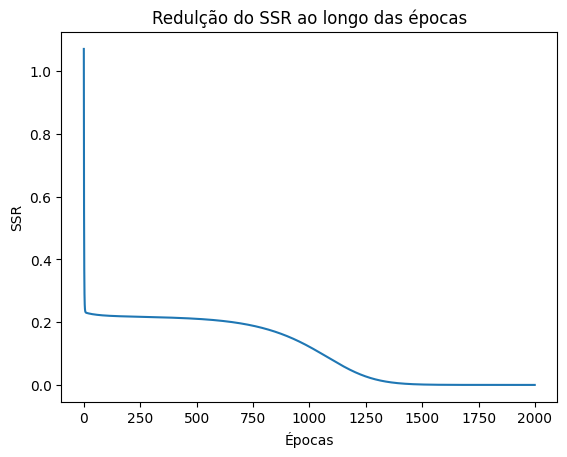

In [356]:
plt.plot(SSR_history)
plt.xlabel('Épocas')
plt.ylabel('SSR')
plt.title('Redulção do SSR ao longo das épocas')
plt.show()


---
---

# 9. B) Simule essa rede com pytorch e código explícito, como dado nos slides

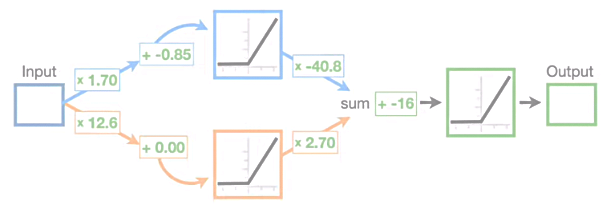

## Com pytorch

In [357]:
simple_dataset = {'dosage': [[0], [0.5], [1]],
                  'label': [[0], [1], [0]]}
dataset_tensor = torch.tensor(simple_dataset['dosage'], dtype=torch.float32)
y_true = torch.tensor(simple_dataset['label'], dtype=torch.float32)

In [377]:
class SimpleNN_trained(nn.Module):
    def __init__(self):
        super(SimpleNN_trained, self).__init__()
        self.w1 = torch.tensor(1.7)
        self.w2 = torch.tensor(12.6)
        self.w3 = torch.tensor(-40.8)
        self.w4 = torch.tensor(2.7)

        self.b1 = torch.tensor(-.85)
        self.b2 = torch.tensor(.0)
        self.b3 = torch.tensor(-16)

        self.activation = nn.ReLU()

    def forward(self, x):
        h1 = self.activation(self.w1 * x + self.b1)  # Neurônio 1
        h2 = self.activation(self.w2 * x + self.b2)  # Neurônio 2
        output = self.activation((self.w3 * h1) + (self.w4 * h2) + self.b3)  # Saída final
        return output

In [378]:
simple_dataset = {'dosage': [[0], [0.5], [1]],
                  'label': [[0], [1], [0]]}
dataset_tensor = torch.tensor(simple_dataset['dosage'], dtype=torch.float32)
y_true = torch.tensor(simple_dataset['label'], dtype=torch.float32)

In [379]:
model = SimpleNN_trained()
output = model(dataset_tensor)

print("Saída da rede:", output.tolist())

Saída da rede: [[0.0], [1.010000228881836], [0.0]]


In [399]:
# novos valores
new_dataset = torch.tensor([0.8, .52, .51, .35, .49], dtype=torch.float32)
output = model(new_dataset)

print("Saída da rede:", output.tolist())

Saída da rede: [0.0, 0.30320167541503906, 0.6566028594970703, 0.0, 0.6698017120361328]


## Com código explícito

In [403]:
def relu(x):
    return max(0, x)  # Função de ativação ReLU

# Pesos e bias definidos na rede
w1, w2, w3, w4 = 1.7, 12.6, -40.8, 2.7
b1, b2, b3 = -0.85, 0.0, -16.0

for x in dataset_tensor.tolist():
  x = x[0]
  # Propagação pela rede
  h1 = relu(w1 * x + b1)  # Neurônio 1
  h2 = relu(w2 * x + b2)  # Neurônio 2
  output_manual = relu((w3 * h1) + (w4 * h2) + b3)  # Saída final

  print("Saída da rede:", output_manual)

Saída da rede: 0
Saída da rede: 1.0100000000000016
Saída da rede: 0


In [405]:
# novos valores
new_dataset = torch.tensor([0.8, .52, .51, .35, .49], dtype=torch.float32)

for x in new_dataset.tolist():
  x = x
  h1 = relu(w1 * x + b1)
  h2 = relu(w2 * x + b2)
  output_manual = relu((w3 * h1) + (w4 * h2) + b3)

  print("Saída da rede:", output_manual)

Saída da rede: 0
Saída da rede: 0.3032006740570061
Saída da rede: 0.6566003370285038
Saída da rede: 0
Saída da rede: 0.6698003244400041


---
---


# 9. C) Treinar com PyTorch a rede dada com três padrões em uma figura com 3x3 pixels. Devem ser definidos os padrões a serem aprendidos.

https://docs.google.com/presentation/d/1VUWUlHU68E-0hc0Q7z9J0RBWU4Ja8AXyd5dv6bJAnYg/edit?usp=sharing

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

In [17]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(9, 4)  # First hidden layer
        self.fc2 = nn.Linear(4, 4)  # Second hidden layer
        self.fc3 = nn.Linear(4, 3)  # Output layer
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation function at the output layer (depends on task)
        return x

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=9, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
  (relu): ReLU()
)


### Definindo padrões a serem aprendidos
* Cruz
* Diagonal
* Quadrado preenchido

Padrão 1 (Cruz):
```
0 1 0
1 1 1
0 1 0
```
Padrão 2 (Diagonal):
```
1 0 0
0 1 0
0 0 1
```
Padrão 3 (Quadrado preenchido):
```
1 1 1
1 1 1
1 1 1
```

Cada imagem 3×3 contém 9 pixels, então a entrada da rede precisa ser um vetor de 9 valores (achatar a matriz 3×3).

In [18]:
# redimensionar para 3x3
transform = transforms.Compose([
    transforms.Resize((3, 3)),
    transforms.ToTensor()
])

data = datasets.MNIST(root="data", download=True, transform=transform)

# apenas 3 classes
classes = [0, 1, 2]
filtered_data = [(img, label) for img, label in data if label in classes]

X = torch.stack([img.view(-1) for img, label in filtered_data])  # Flatten 3x3 -> 9 valores
y = torch.tensor([classes.index(label) for _, label in filtered_data])  # Converter labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.01)
num_epochs = 50
batch_size = int(len(X_train)/5)

# DataLoader
dataset = torch.utils.data.TensorDataset(X_train, y_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

## treinamento
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()  # Zerar gradientes
        outputs = model(batch_X)  # Forward pass

        loss = criterion(outputs, batch_y)
        loss.backward()  # Backpropagation
        optimizer.step()  # Atualizar pesos
    if (epoch+1) % 5 == 0:
        print(f"Época {epoch+1}/{num_epochs}, Perda: {loss.item():.4f}")

Época 5/50, Perda: 1.1348
Época 10/50, Perda: 1.1131
Época 15/50, Perda: 1.0214
Época 20/50, Perda: 0.8640
Época 25/50, Perda: 0.9988
Época 30/50, Perda: 0.4129
Época 35/50, Perda: 0.6523
Época 40/50, Perda: 0.7433
Época 45/50, Perda: 0.5168
Época 50/50, Perda: 0.0169


In [20]:
samples, labels = X_test, y_test #filtered_data[-1]

result = []

for sample, label in zip(samples, labels):
  sample = sample.view(-1)  # achatar imagem (3x3 -> 9)
  output = model(sample.unsqueeze(0))  # add dimensão extra para batch
  predicted_class = torch.argmax(output).item()
  result.append([label.item(), predicted_class])

  #print(f"Classe real: {label}, Classe prevista: {classes[predicted_class]}")

In [21]:
result_df = pd.DataFrame(result, columns=['Classe real', 'Classe prevista'])
result_df

,Classe real,Classe prevista
0,2,2
1,0,0
2,0,0
3,2,2
4,1,1
...,...,...
4651,0,0
4652,2,2
4653,1,1
4654,1,1
